# <h1 style="color:red; font-family: Arial;">SVM-FOREST FIRES DATA</h1>

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">classify the Size_Categorie using SVM </h3>

# 2 - Data collection 

In [2]:
df = pd.read_csv('./forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# 3 - EDA

In [3]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
#checking for duplicate values
df[df.duplicated(keep=False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
99,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
214,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
302,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
425,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
# drop duplicates
df[df.duplicated()].index

Index([53, 100, 215, 303, 426, 461, 501, 508], dtype='int64')

In [7]:
df.drop(index=df[df.duplicated()].index,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr       

In [9]:
print(f"Non Numeric Columns : {[x for x in df.columns if df[x].dtype == 'O']}")


Non Numeric Columns : ['month', 'day', 'size_category']


<span style="color:blue; font-family: Arial;">For Month and Day column we can drop that since the dataset already contains one hot encoded information about the same</span>

In [10]:
df.drop(['month','day'],axis=1,inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           509 non-null    float64
 1   DMC            509 non-null    float64
 2   DC             509 non-null    float64
 3   ISI            509 non-null    float64
 4   temp           509 non-null    float64
 5   RH             509 non-null    int64  
 6   wind           509 non-null    float64
 7   rain           509 non-null    float64
 8   area           509 non-null    float64
 9   dayfri         509 non-null    int64  
 10  daymon         509 non-null    int64  
 11  daysat         509 non-null    int64  
 12  daysun         509 non-null    int64  
 13  daythu         509 non-null    int64  
 14  daytue         509 non-null    int64  
 15  daywed         509 non-null    int64  
 16  monthapr       509 non-null    int64  
 17  monthaug       509 non-null    int64  
 18  monthdec       

_<span style="color:blue; font-family: Arial;">'Size_category' is the target column, and only column left as object</span>_

<h3 style="color:black; font-family: Arial;">Label Encoding</h3>


In [12]:
lbenc = LabelEncoder()

df['size_category'] = lbenc.fit_transform(df['size_category'])

In [13]:
lbenc.classes_

array(['large', 'small'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           509 non-null    float64
 1   DMC            509 non-null    float64
 2   DC             509 non-null    float64
 3   ISI            509 non-null    float64
 4   temp           509 non-null    float64
 5   RH             509 non-null    int64  
 6   wind           509 non-null    float64
 7   rain           509 non-null    float64
 8   area           509 non-null    float64
 9   dayfri         509 non-null    int64  
 10  daymon         509 non-null    int64  
 11  daysat         509 non-null    int64  
 12  daysun         509 non-null    int64  
 13  daythu         509 non-null    int64  
 14  daytue         509 non-null    int64  
 15  daywed         509 non-null    int64  
 16  monthapr       509 non-null    int64  
 17  monthaug       509 non-null    int64  
 18  monthdec       

# 3 - Visualization

<Axes: xlabel='FFMC', ylabel='DC'>

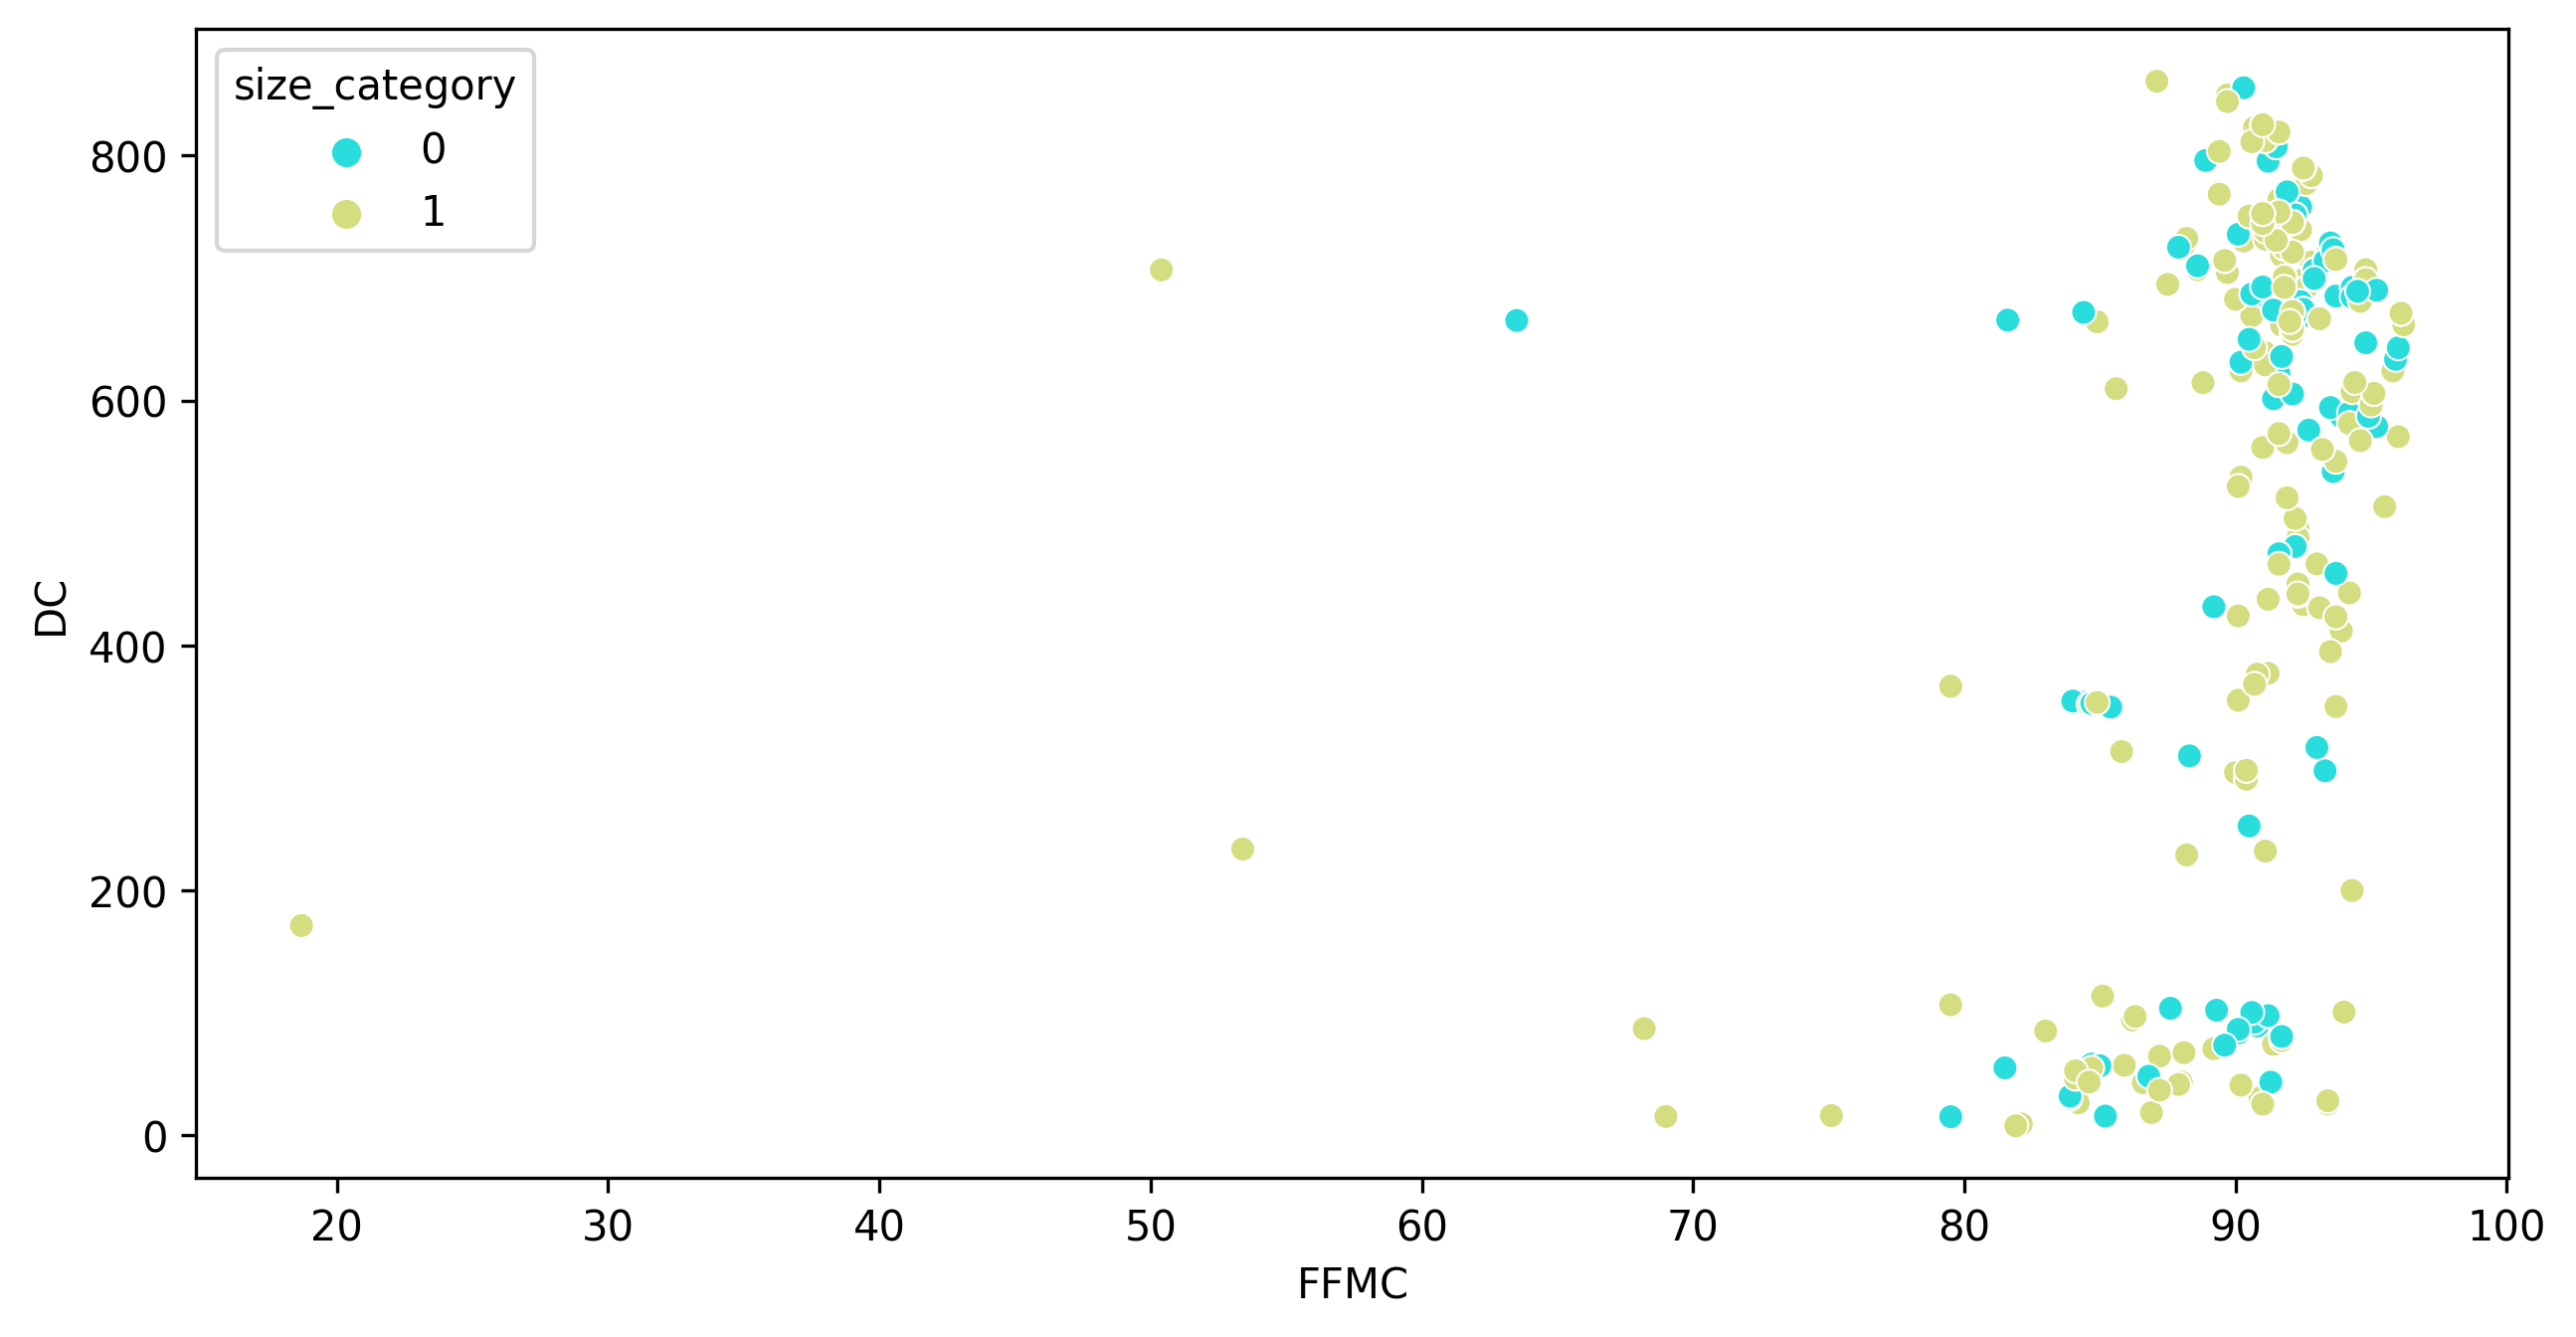

In [15]:
sns.scatterplot(x=df['FFMC'],y=df['DC'],hue=df['size_category'],palette='rainbow')


<Axes: xlabel='temp', ylabel='wind'>

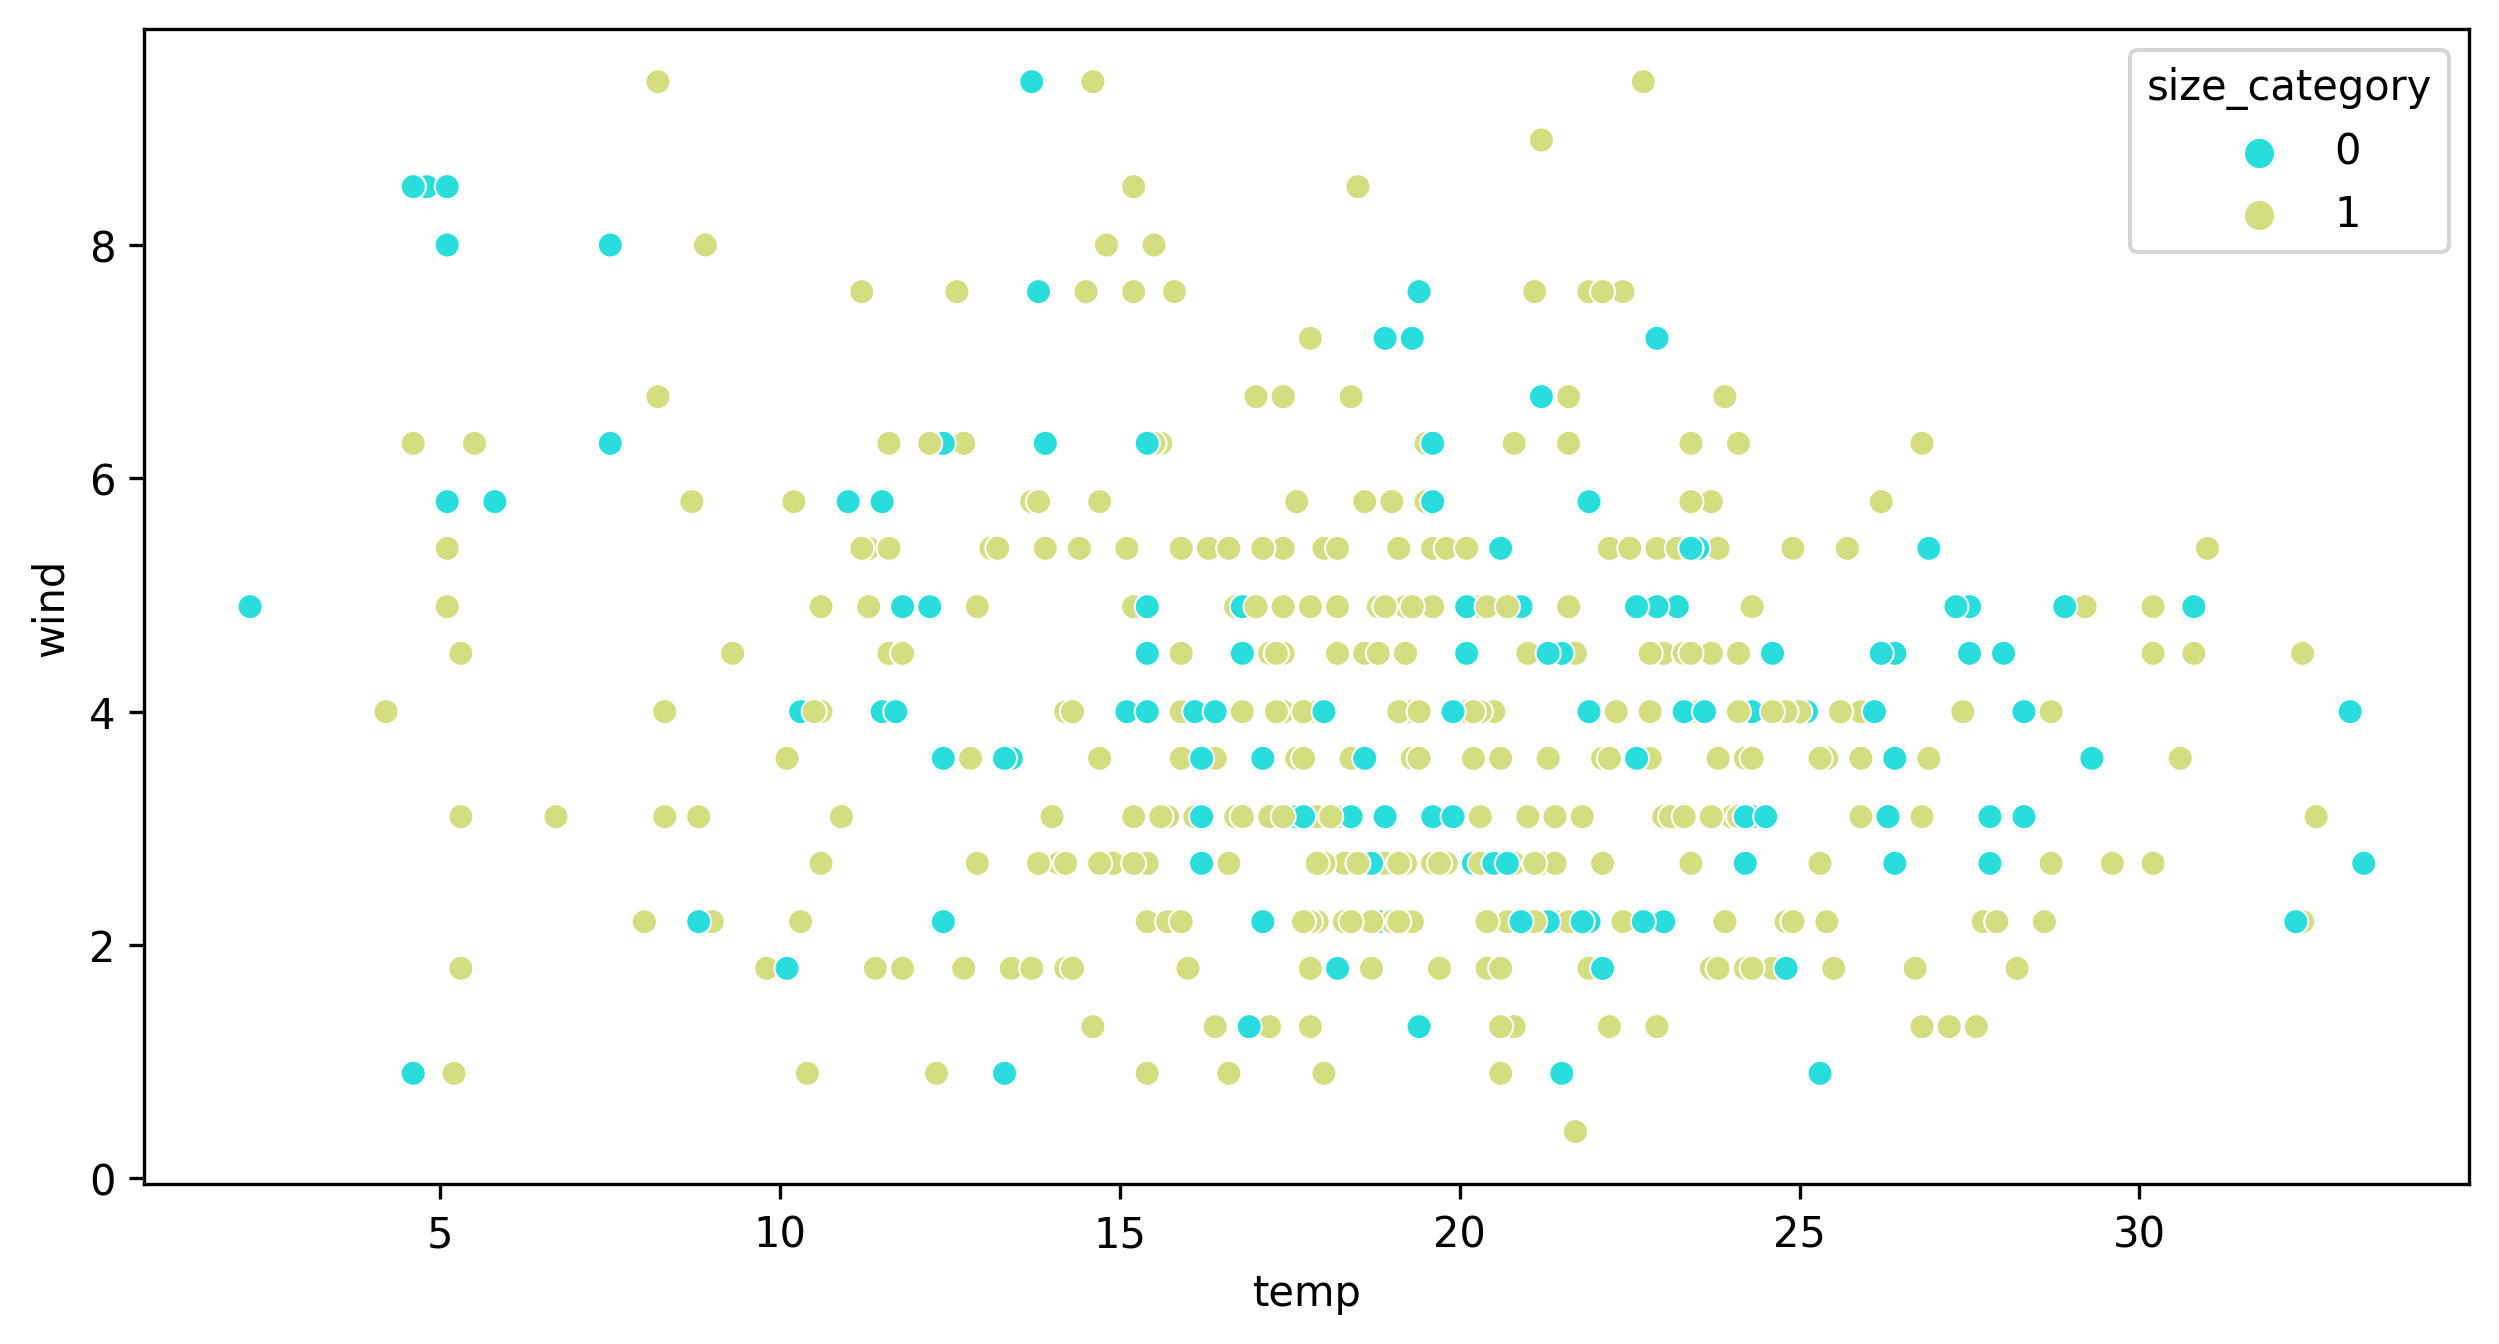

In [16]:
sns.scatterplot(x=df['temp'],y=df['wind'],hue=df['size_category'],palette='rainbow')


<Axes: xlabel='temp', ylabel='rain'>

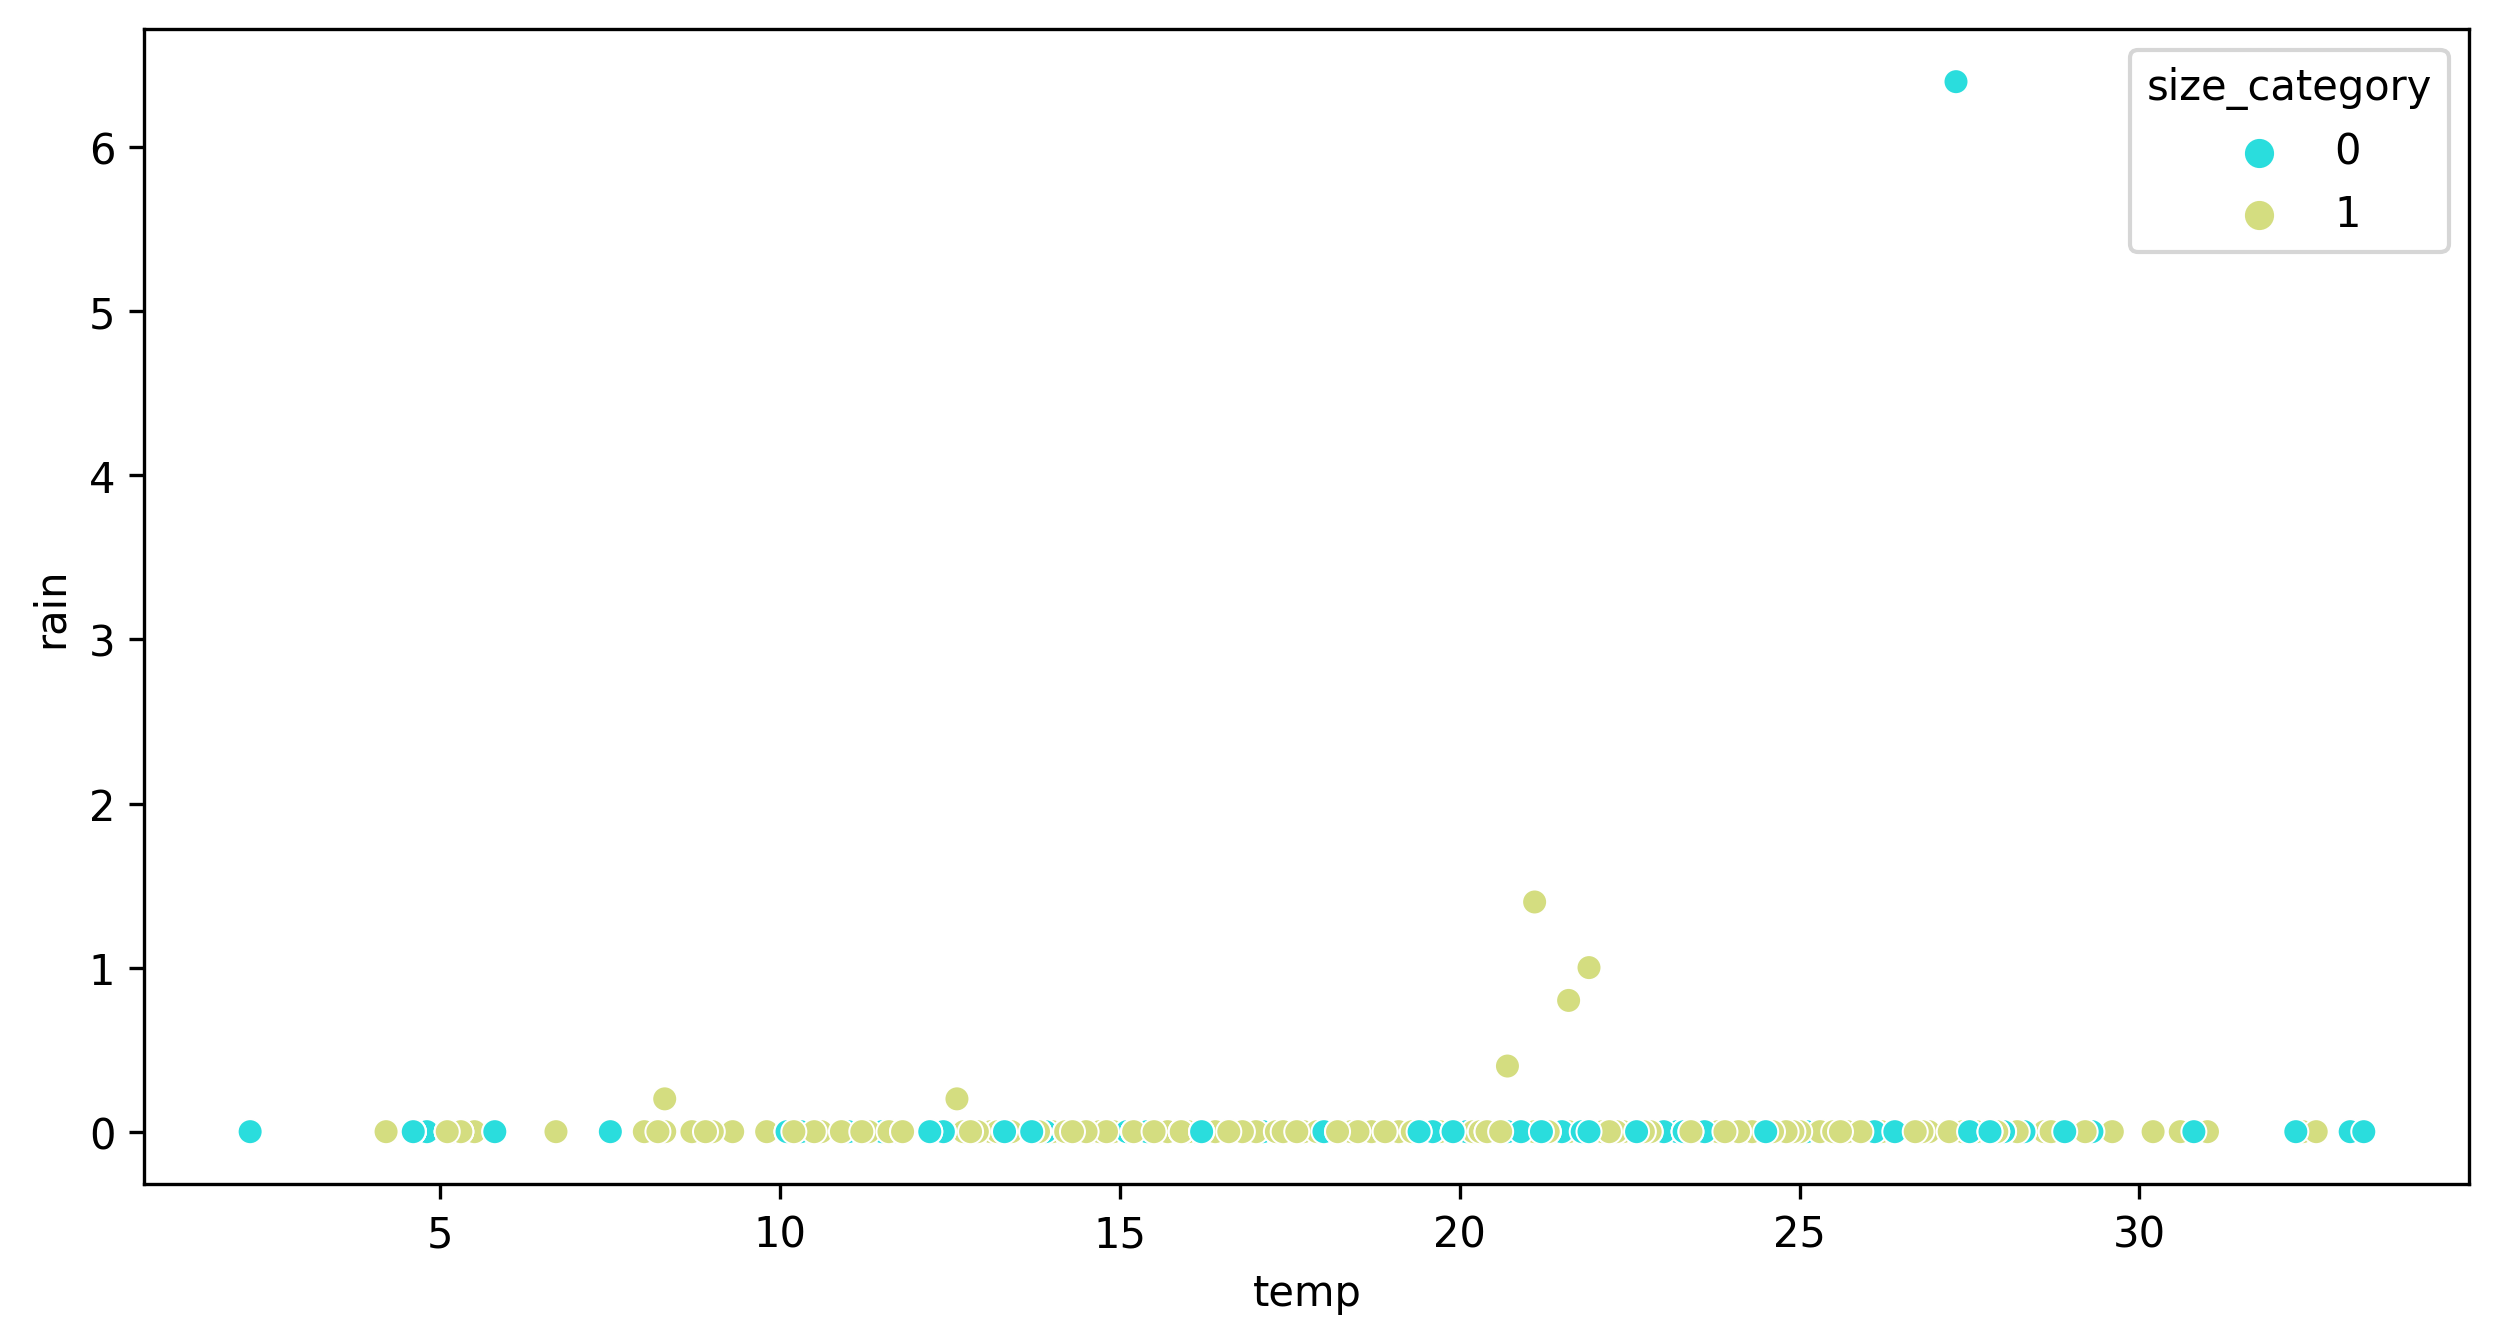

In [17]:
sns.scatterplot(x=df['temp'],y=df['rain'],hue=df['size_category'],palette='rainbow')


<Axes: xlabel='size_category', ylabel='count'>

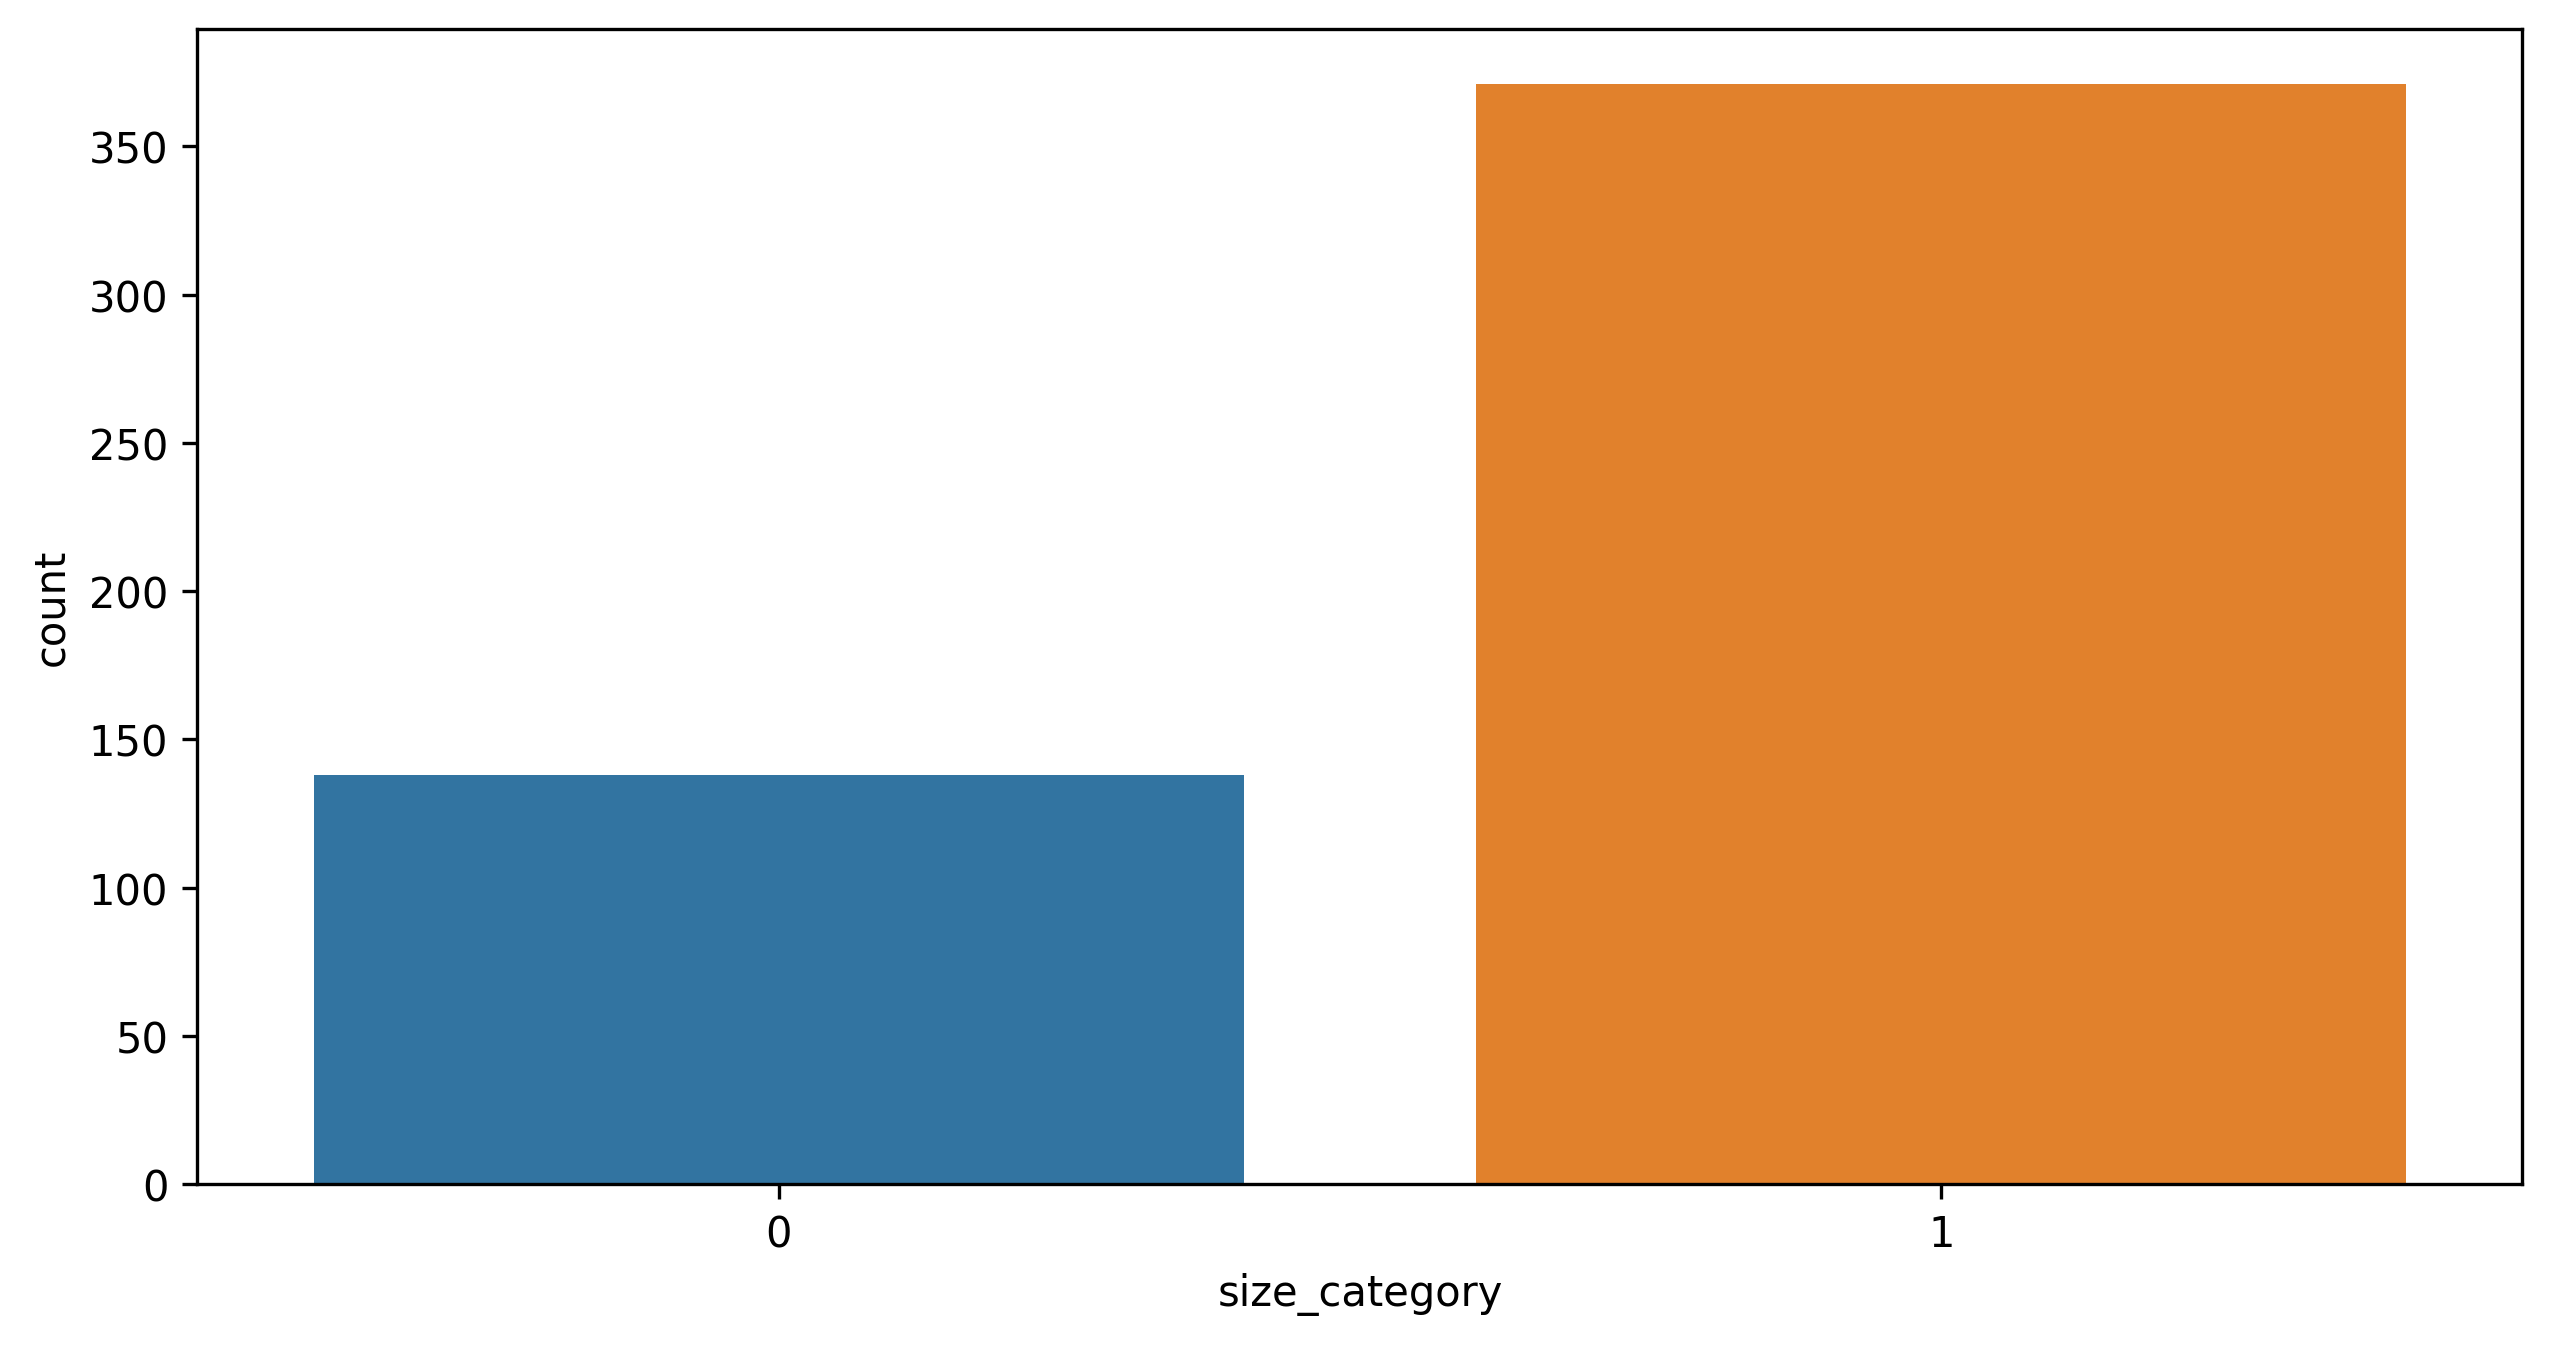

In [18]:
sns.countplot(data=df,x='size_category')


## Data Preprocessing

In [19]:
X = df.drop('size_category',axis=1)
Y = df['size_category']


In [20]:
# standardizing the data
std = StandardScaler()
scaled = std.fit_transform(X)
scaled

array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

# 4 - SVC

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled,Y,test_size=0.15,random_state=42)


In [22]:
svc = SVC()
svc.fit(xtrain,ytrain)

SVC()

In [23]:
print(f"Train Score : {svc.score(xtrain,ytrain)}")
print(f"Test Score : {svc.score(xtest,ytest)}")

Train Score : 0.7754629629629629
Test Score : 0.8311688311688312


In [24]:
ypred = svc.predict(xtest)

In [25]:
print('Train Report')
print(classification_report(ytrain,svc.predict(xtrain)))

Train Report
              precision    recall  f1-score   support

           0       1.00      0.18      0.30       118
           1       0.76      1.00      0.87       314

    accuracy                           0.78       432
   macro avg       0.88      0.59      0.58       432
weighted avg       0.83      0.78      0.71       432



In [26]:
print('Test Report')
print(classification_report(ytest,ypred))

Test Report
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        20
           1       0.81      1.00      0.90        57

    accuracy                           0.83        77
   macro avg       0.91      0.68      0.71        77
weighted avg       0.86      0.83      0.80        77



Text(0.5, 77.16666666666664, 'Predicted')

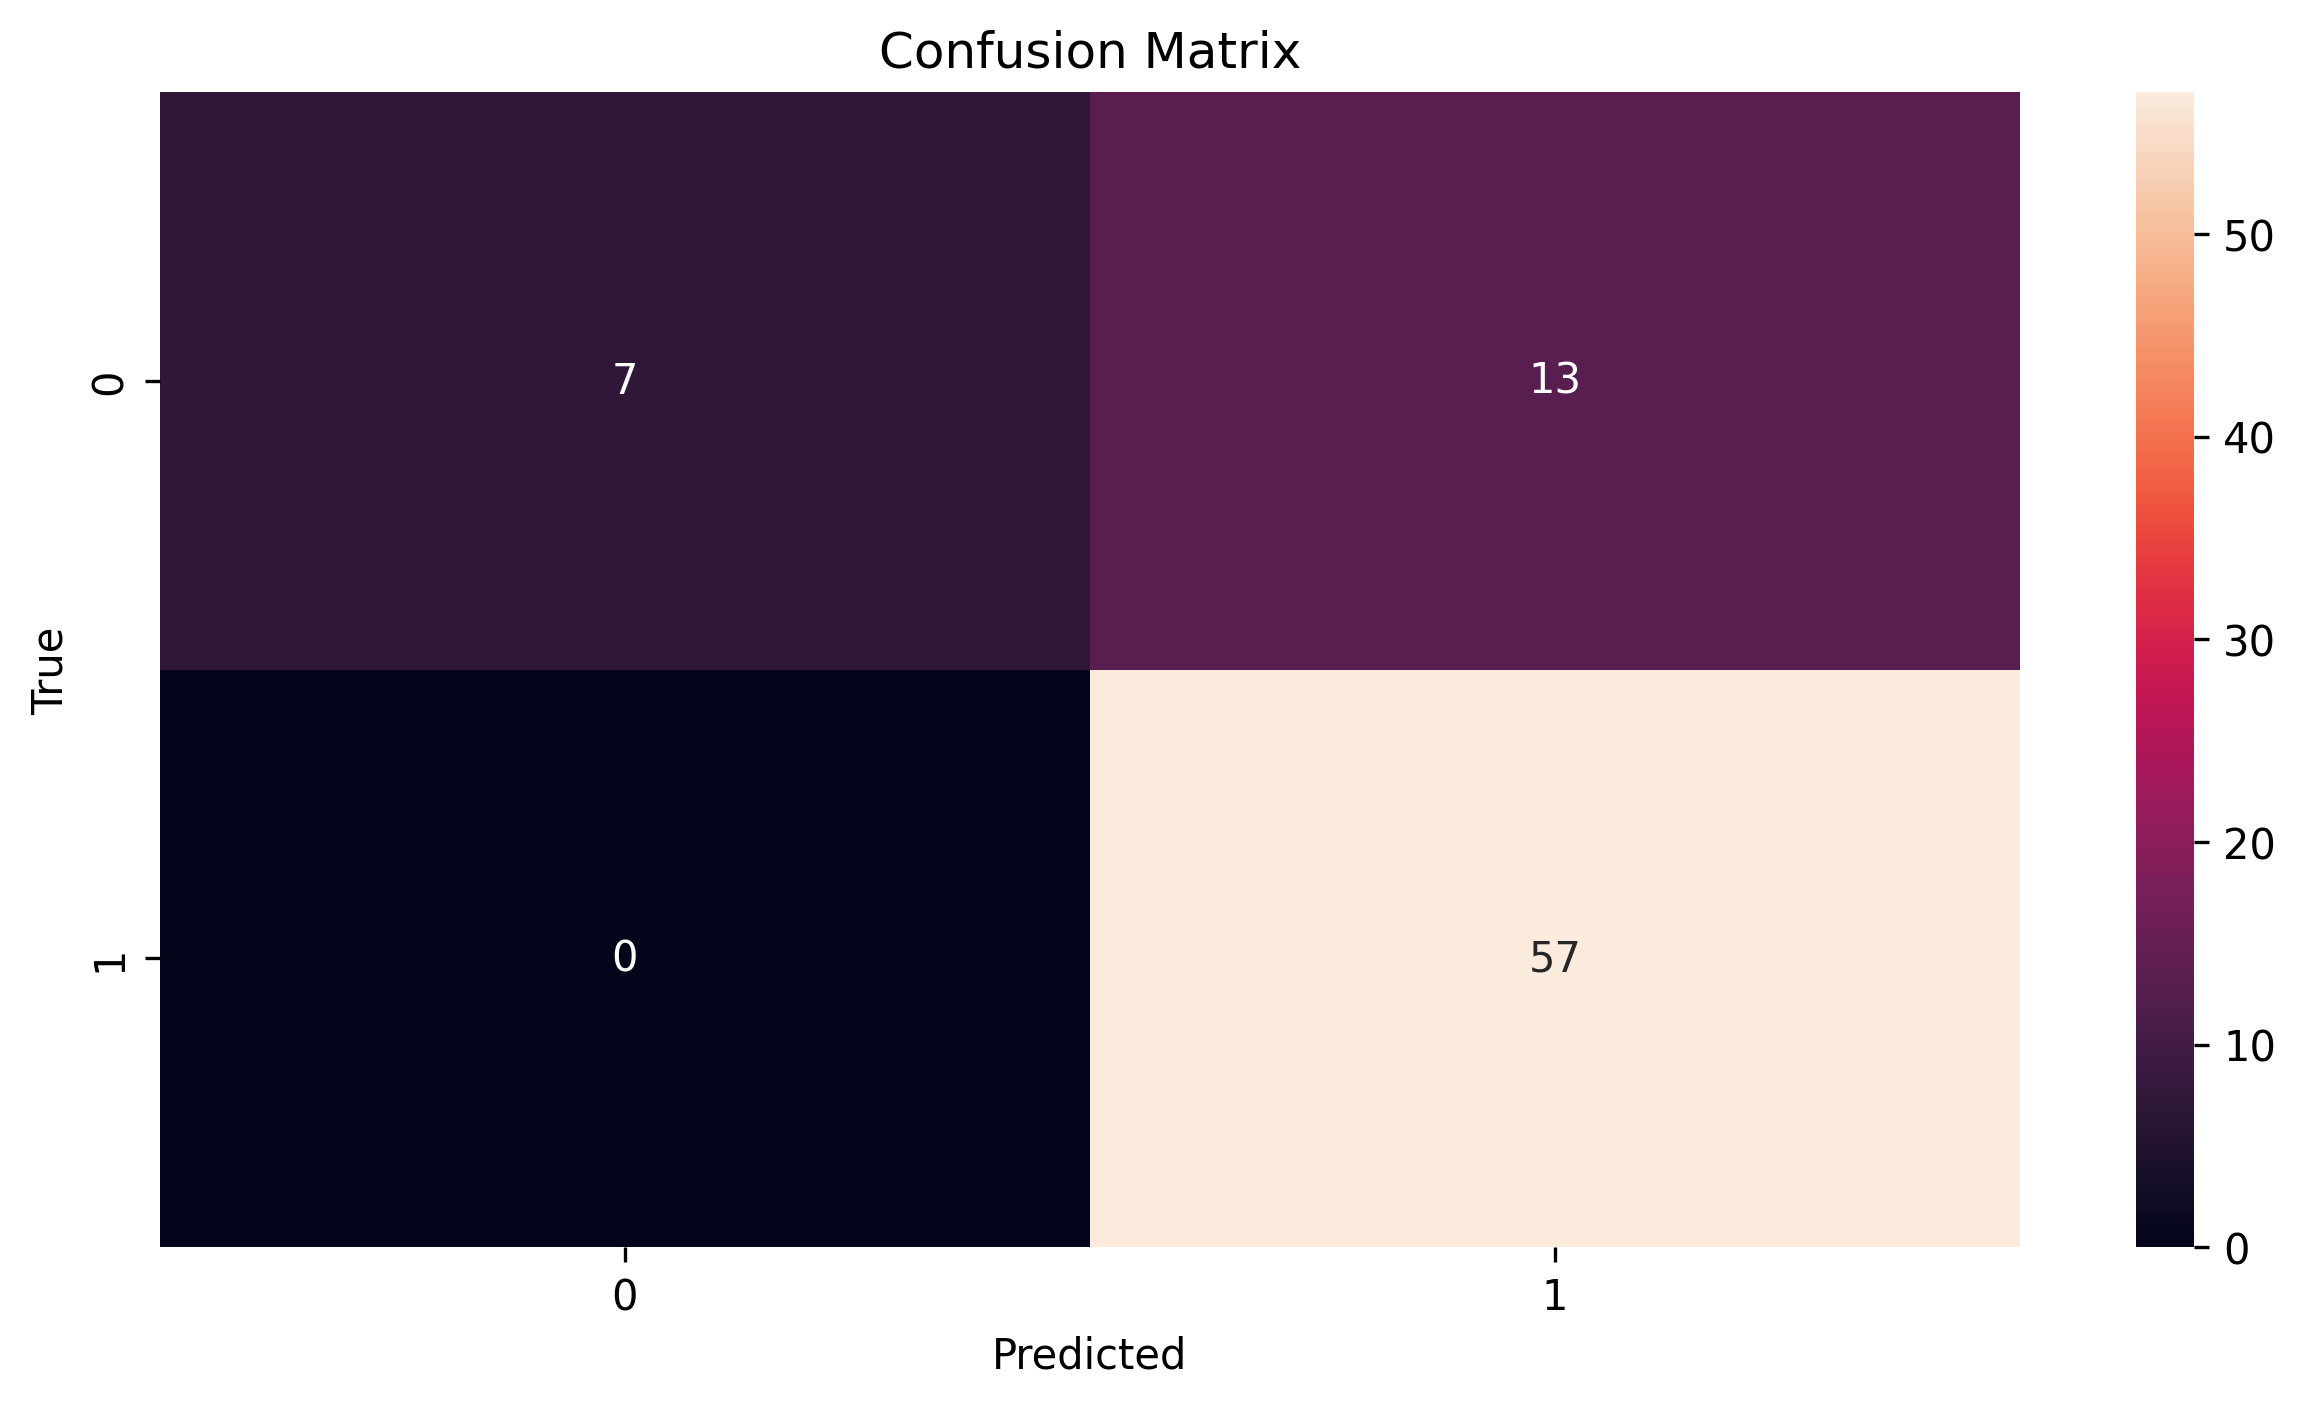

In [27]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

# 5 - Hyper Parameter Tuning

In [28]:
params = {
    'kernel': ['linear','poly','rbf'],
    'gamma': [0.1,0.01,0.001,1,10],
    'C': [0.1,0.001,1,10]
}

In [29]:
grid = GridSearchCV(SVC(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 10],
                         'gamma': [0.1, 0.01, 0.001, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [30]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [31]:
grid.best_score_

0.9791499599037691

# 6 - Final model

In [32]:
fmodel = SVC(C=10,gamma=0.1,kernel='linear').fit(xtrain,ytrain)

In [33]:
print(f"Train Score : {fmodel.score(xtrain,ytrain)}")
print(f"Test Score : {fmodel.score(xtest,ytest)}")

Train Score : 0.9907407407407407
Test Score : 0.974025974025974


In [34]:
ypred = fmodel.predict(xtest)

In [35]:
print(' Train Report')
print(classification_report(ytrain,fmodel.predict(xtrain)))


 Train Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       118
           1       0.99      1.00      0.99       314

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



In [36]:
print('Test Report')
print(classification_report(ytest,ypred))

Test Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.98      0.98      0.98        57

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



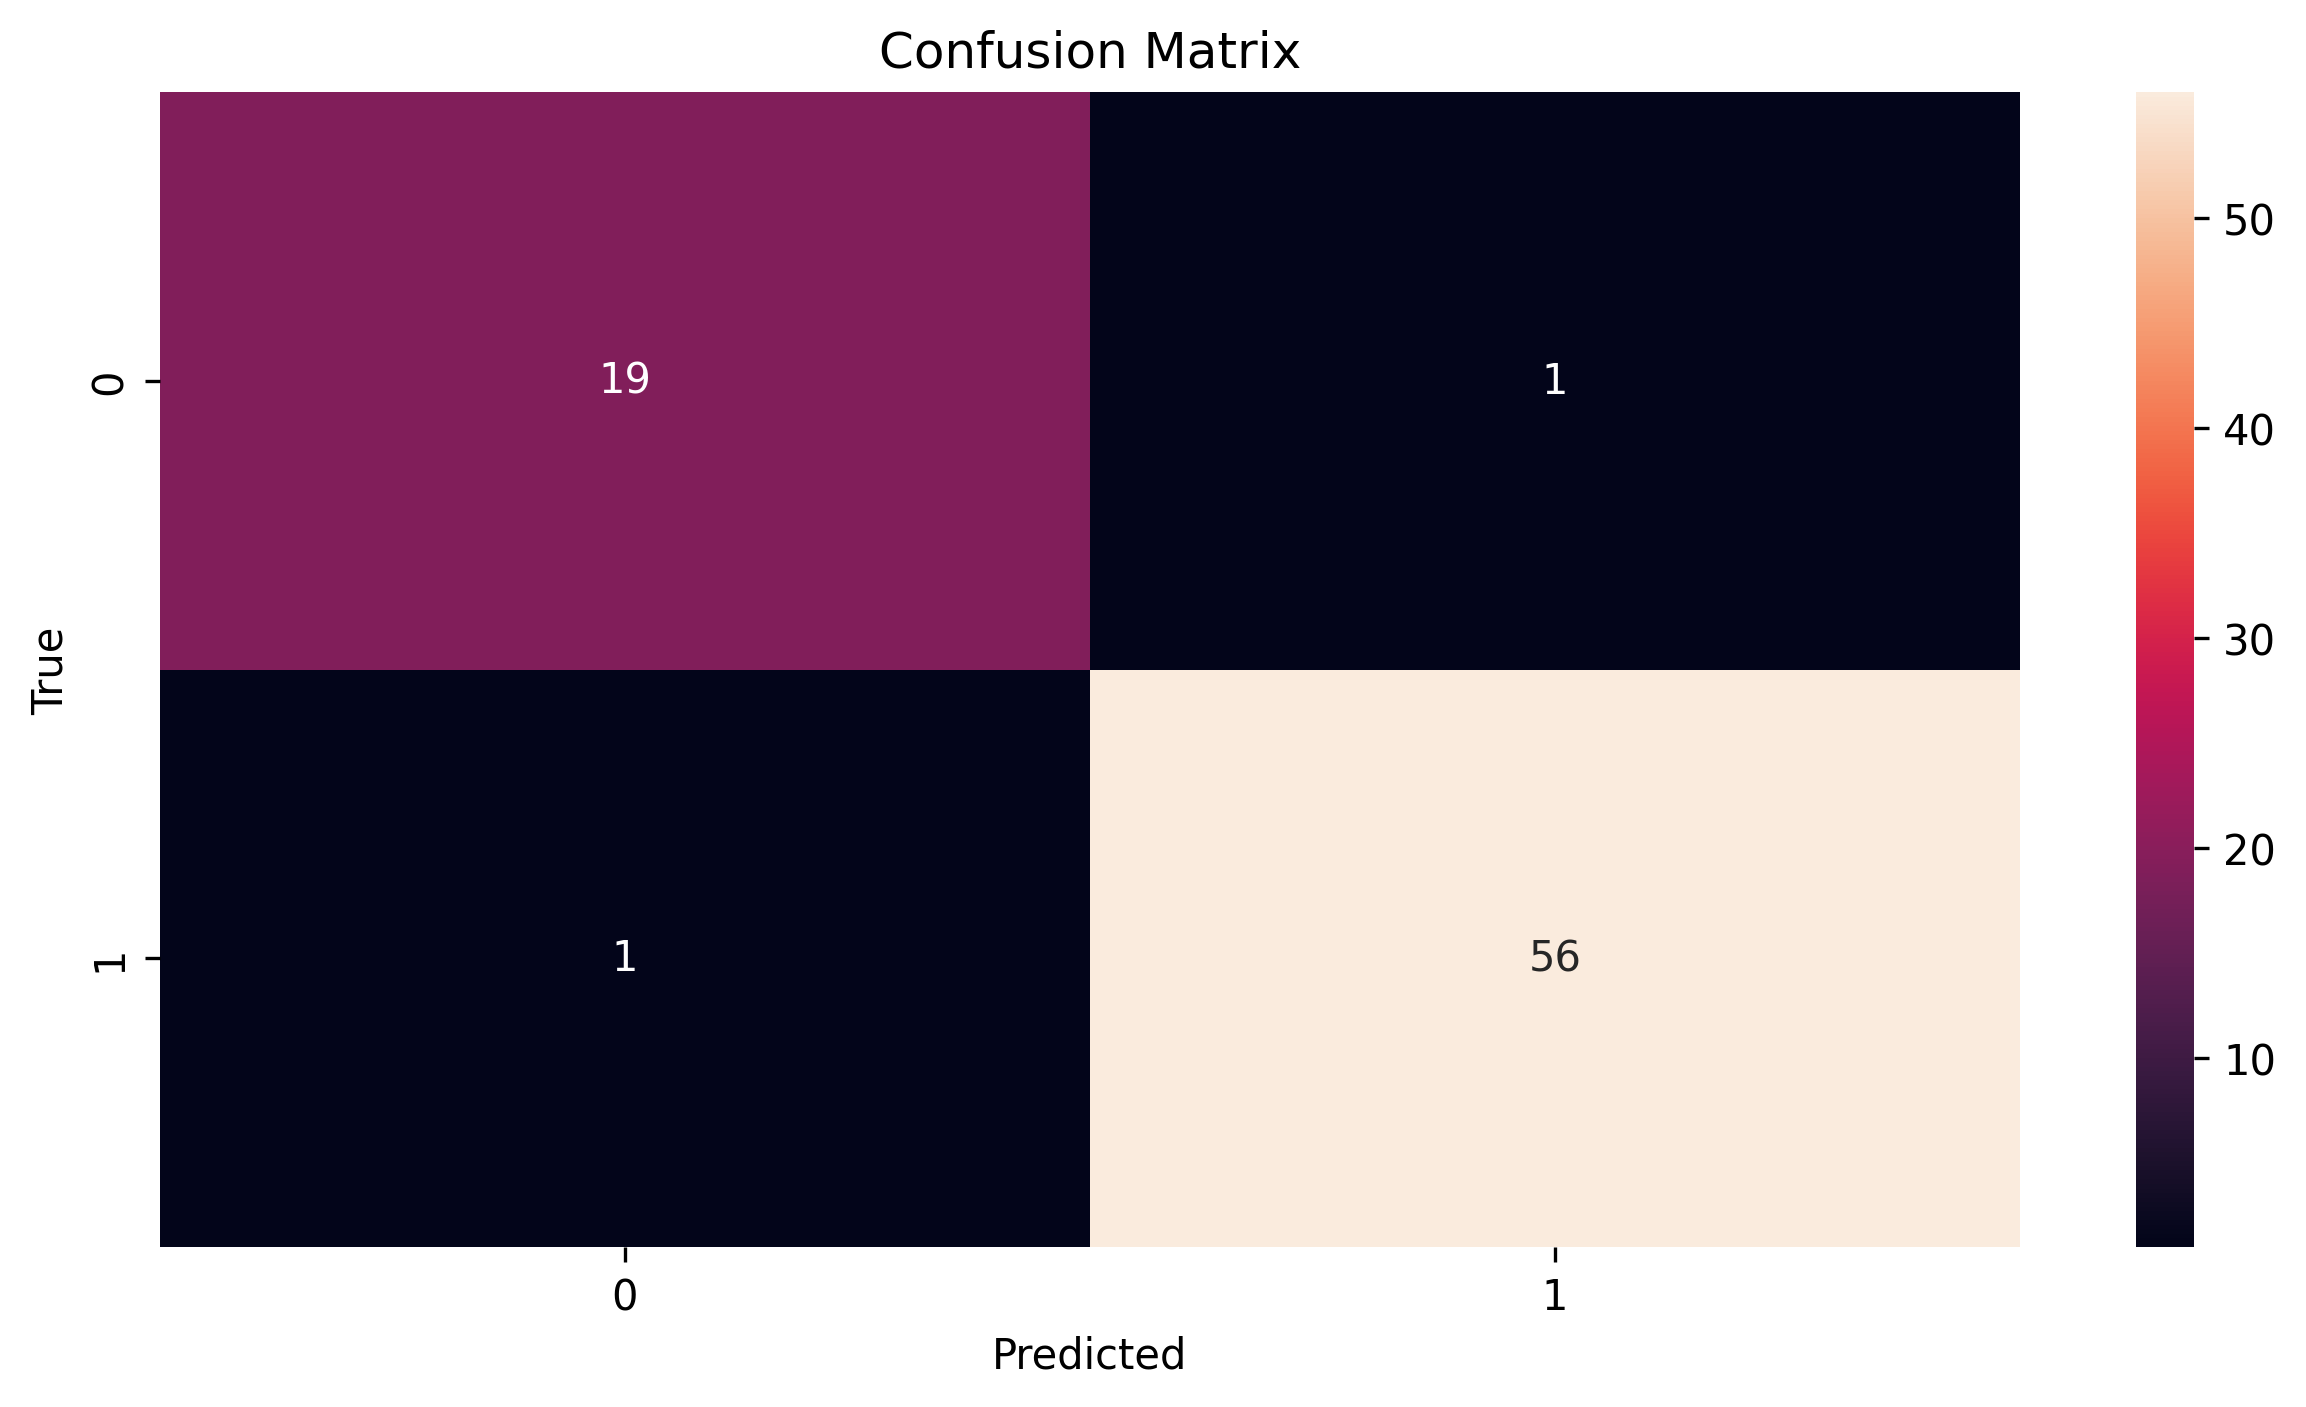

In [37]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

_<span style="color:blue; font-family: Arial;">Model performance improved</span>_